# Load Dataset

<AxesSubplot:title={'center':'Airline Passengers Over Time'}, xlabel='Period'>

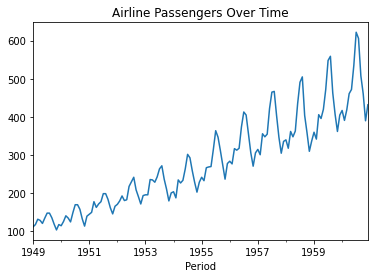

In [1]:
from sktime.datasets import load_airline

y = load_airline()

y.plot(title='Airline Passengers Over Time')

# Split y into Train and Test Groups

In [2]:
from sktime.forecasting.all import temporal_train_test_split

In [3]:
y_train, y_test = temporal_train_test_split(y)

In [4]:
y_train.index.min(), y_train.index.max()

(Period('1949-01', 'M'), Period('1957-12', 'M'))

In [5]:
y_test.index.min(), y_test.index.max()

(Period('1958-01', 'M'), Period('1960-12', 'M'))

# AR of ARIMA

In [8]:
from sktime.forecasting.arima import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

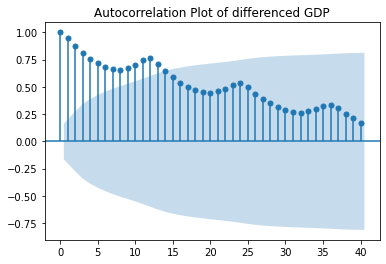

In [9]:
p = plot_acf(y, lags=40, title='Autocorrelation Plot of GDP')
p = plot_pacf(y, lags=5, title='Partial Autocorrelation Plot of original GDP')

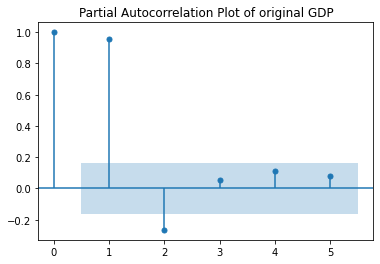

In [16]:
p = plot_pacf(y, lags=5, title='Partial Autocorrelation Plot of original GDP')

p is the lags in the autoregression and is the first parameter of the order

In [26]:
ar_model = ARIMA(order=(1,0,0))

In [27]:
ar_model.fit(y_train)

ARIMA()

In [28]:
fh = list(range(1, 1+len(y_test)))

In [29]:
y_pred = ar_model.predict(fh=fh )

Plot the results where blue is actual and the red is your prediction

<AxesSubplot:xlabel='Period'>

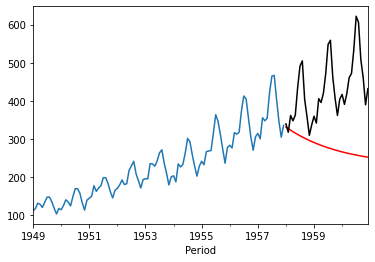

In [30]:
y_train.plot()
y_pred.plot(color='red')
y_test.plot(color = 'black')

# Evaluate yhat

In [31]:
from sktime.performance_metrics.forecasting import smape_loss

In [32]:
smape_loss(y_test, y_pred )

0.39298196507321065

# Try Higher Orders

SMAPE: 0.4500247006380202


<AxesSubplot:xlabel='Period'>

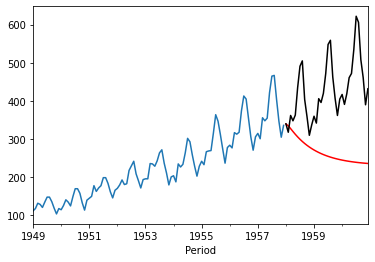

In [33]:
ar2_model = ARIMA(order=(2,0,0))
ar2_model.fit(y_train)
fh = list(range(1,1+len(y_test)))
y_pred = ar2_model.predict(fh=fh)
smape = smape_loss(y_test, y_pred)
print(f'SMAPE: {smape}')
y_train.plot()
y_pred.plot(color='red')
y_test.plot(color = 'black')

Why do we think we are getting such bad predictions?

# Try a different time series

<AxesSubplot:title={'center':'Lynx Trappings Over Time'}, xlabel='Period'>

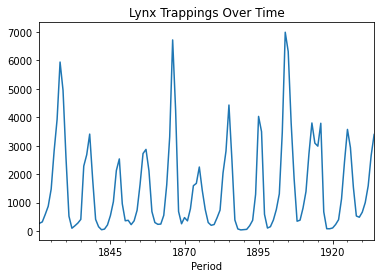

In [17]:
from sktime.datasets import load_lynx
y=load_lynx()
y.plot(title='Lynx Trappings Over Time')

# Split y into Train and Test Groups

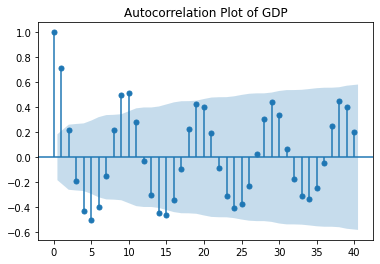

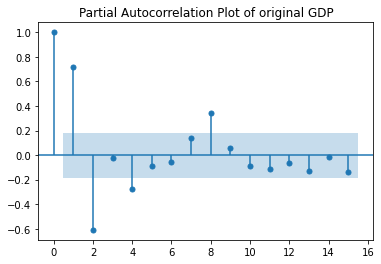

In [20]:
p = plot_acf(y, lags=40, title='Autocorrelation Plot of GDP')
p = plot_pacf(y, lags=15, title='Partial Autocorrelation Plot of original GDP')

In [18]:
from sktime.forecasting.all import temporal_train_test_split

In [40]:
y_train, y_test = temporal_train_test_split(y)

In [41]:
y_train.index.min(), y_train.index.max()

(Period('1821', 'A-DEC'), Period('1905', 'A-DEC'))

In [42]:
y_test.index.min(), y_test.index.max()

(Period('1906', 'A-DEC'), Period('1934', 'A-DEC'))

# AR of ARIMA

In [43]:
from sktime.forecasting.arima import ARIMA

p is the lags in the autoregression and is the first parameter of the order

In [44]:
ar_model = ARIMA(order=(1,0,0))

In [45]:
ar_model.fit(y_train)

ARIMA()

In [46]:
fh = list(range(1, 1+len(y_test)))

In [47]:
y_pred = ar_model.predict(fh=fh )

Plot the results where blue is actual and the red is your prediction

<AxesSubplot:xlabel='Period'>

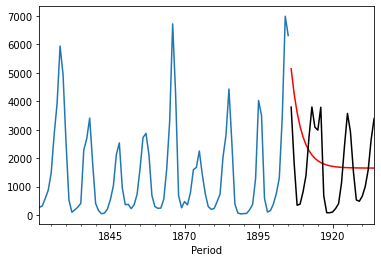

In [48]:
y_train.plot()
y_pred.plot(color='red')
y_test.plot(color = 'black')

# Try Higher Orders

SMAPE: 0.8202444876835575


<AxesSubplot:xlabel='Period'>

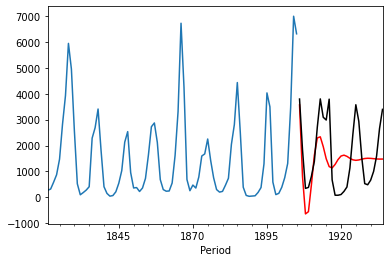

In [49]:
ar2_model = ARIMA(order=(2,0,0))
ar2_model.fit(y_train)
fh = list(range(1,1+len(y_test)))
y_pred = ar2_model.predict(fh=fh)
smape = smape_loss(y_test, y_pred)
print(f'SMAPE: {smape}')
y_train.plot()
y_pred.plot(color='red')
y_test.plot(color = 'black')

This is better. What do we think is happening here?